In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentence', 'score']

In [3]:
yelp_raw['score'] = (yelp_raw['score'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [4]:
yelp_raw2 = yelp_raw.copy() # for classifier 2
yelp_raw3 = yelp_raw.copy() # for classifier 3
yelp_raw4 = yelp_raw.copy() # for classifier 4
yelp_raw5 = yelp_raw.copy() # for classifier 5

In [5]:
keywords = ['love', 'good', 'great',  'right', 'beautiful','amazing','happy','like','delight','positive']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

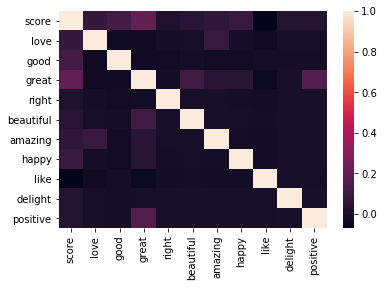

In [6]:
sns.heatmap(yelp_raw.corr())

In [7]:
data = yelp_raw[keywords]
target = yelp_raw['score']

### Classifier Version 1 - the original

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 412


In [9]:
# # Build your confusion matrix and calculate sensitivity and specificity here.
# def my_confusion_matrix (target,y_pred):
#     # target is a column of a df (aka a series) that has booleans 
#     # informing the true nature of a data entry. y_pred has a series 
#     # of booleans depending on the prediction of the model
#     s1 = pd.Series(target, name='s1')
#     s2 = pd.Series(y_pred, name='s2')
#     df = pd.concat([s1, s2], axis=1) #concatinate the two series along columns
#     df['confusion'] = np.nan
#     for i in range(df.shape[0]):
#         if (df['s1'].iloc[i] == True and df['s2'].iloc[i] == True):
#             df['confusion'].iloc[i] = 'a'
#         elif (df['s1'].iloc[i] == True and df['s2'].iloc[i] == False):
#             df['confusion'].iloc[i] = 'b'
#         elif (df['s1'].iloc[i] == False and df['s2'].iloc[i] == True):
#             df['confusion'].iloc[i] = 'c'
#         else:
#             df['confusion'].iloc[i] = 'd'
#     a = (df.confusion == 'a').sum()
#     b = (df.confusion == 'b').sum()
#     c = (df.confusion == 'c').sum()
#     d = (df.confusion == 'd').sum()
#     df1 = pd.DataFrame(np.array([[a,b],[c,d]]),columns=['neg','pos'])
#     sens = '{:.2%}'.format(d/(c+d))
#     spec = '{:.2%}'.format(a/(a+b))
#     print(f'Sensitivity = {sens} and Specificity = {spec}')
#     print(df1)

# my_confusion_matrix(target,y_pred)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[479,  21],
       [391, 109]])

In [11]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.588


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.59, 0.57, 0.59, 0.55, 0.57, 0.61, 0.57, 0.55, 0.64])

### Classifier Version 2 - Add more positive words

In [13]:
keywords = ['awesome',
               'love', 
               'good', 
               'great',  
               'right', 
               'beautiful',
               'amazing',
               'happy',
               'like',
               'delight',
               'positive', 
               'authentic']

In [14]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. However, this means the first and last word of a sentence is ignored
    yelp_raw2[str(key)] = yelp_raw2.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

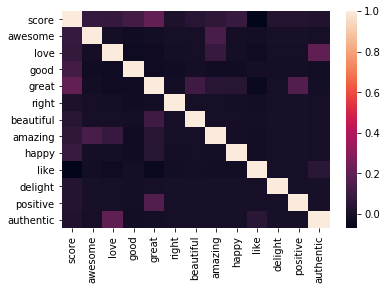

In [15]:
sns.heatmap(yelp_raw2.corr())

data = yelp_raw2[keywords]
target = yelp_raw2['score']

In [16]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 407


In [17]:
confusion_matrix(target, y_pred)

array([[477,  23],
       [384, 116]])

In [18]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.61
Testing on Sample: 0.593


In [19]:
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.59, 0.57, 0.58, 0.56, 0.57, 0.62, 0.58, 0.57, 0.65])

### Classifier Version 3 - Add neg words?

In [20]:
keywords = ['awesome','love', 'good', 'great',  'right', 'beautiful',
            'amazing','happy','like','delight','positive', 'authentic', 'no', 'disgusted', 'shocked','not', 'terrible']

In [21]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. However, this means the first and last word of a sentence is ignored
    yelp_raw3[str(key)] = yelp_raw3.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

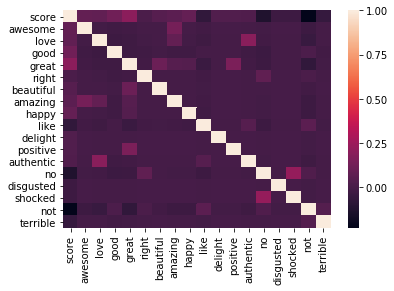

In [22]:
sns.heatmap(yelp_raw3.corr())

data = yelp_raw3[keywords]
target = yelp_raw3['score']

In [23]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 409


In [24]:
confusion_matrix(target, y_pred)

array([[122, 378],
       [ 31, 469]])

In [25]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.591


In [26]:
cross_val_score(bnb, data, target, cv=10)

array([0.62, 0.55, 0.6 , 0.52, 0.57, 0.6 , 0.62, 0.59, 0.59, 0.63])

### Classifier Version 4 - Add neg words, flip booleans

In [27]:
poskeywords = ['awesome',
               'love', 
               'good', 
               'great',  
               'right', 
               'beautiful',
               'amazing',
               'happy',
               'like',
               'delight',
               'positive', 
               'authentic',
               'loved']

In [28]:
negkeywords = ['no', 
               'disgusted', 
               'shocked',
               'not', 
               'terrible']

In [29]:
for key in poskeywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw4[str(key)] = yelp_raw4.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [30]:
for key in negkeywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. 
    yelp_raw4[str(key)] = yelp_raw4.sentence.str.contains(
        ' ' + str(key) + ' ',
       case=False
    )
    yelp_raw4[str(key)]= ~yelp_raw4[str(key)]
    

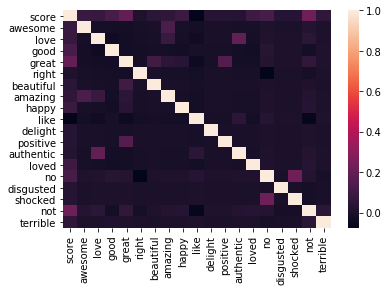

In [31]:
sns.heatmap(yelp_raw4.corr())

In [32]:
data = yelp_raw4[poskeywords + negkeywords]
target = yelp_raw4['score']

In [33]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 397


In [34]:
confusion_matrix(target, y_pred)

array([[482,  18],
       [379, 121]])

In [35]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.603


In [36]:
cross_val_score(bnb, data, target, cv=10)

array([0.62, 0.55, 0.59, 0.52, 0.57, 0.59, 0.64, 0.59, 0.58, 0.63])

### Classifier Version 5 - Only neg words, flip booleans

In [37]:
# poskeywords = ['awesome',
#                'love', 
#                'good', 
#                'great',  
#                'right', 
#                'beautiful',
#                'amazing',
#                'happy',
#                'like',
#                'delight',
#                'positive', 
#                'authentic',
#                'loved']

In [38]:
negkeywords = ['no', 
               'disgusted', 'disgusting','avoid',
               'shocked','never', 'bad',
               'not', 
               'terrible', 'dont', 'rather', 'letdown', 'disappointed','last','unhealthy','expensive','zero']

In [39]:
# for key in poskeywords:
#     # Note that we add spaces around the key so that we're getting the word,
#     # not just pattern matching.
#     yelp_raw4[str(key)] = yelp_raw4.sentence.str.contains(
#         ' ' + str(key) + ' ',
#         case=False
#     )

In [40]:

for key in negkeywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. 
    yelp_raw5[str(key)] = yelp_raw5.sentence.str.contains(
        ' ' + str(key) + ' ',
       case=False
    )
    yelp_raw5[str(key)]= ~yelp_raw5[str(key)]
    

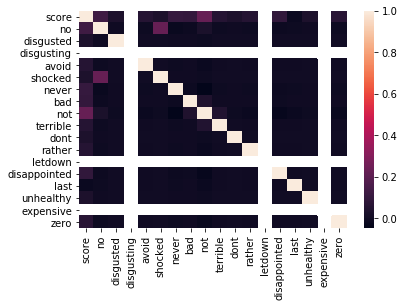

In [41]:
sns.heatmap(yelp_raw5.corr())

In [42]:
data = yelp_raw5[negkeywords]
target = yelp_raw5['score']

In [43]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 373


In [44]:
confusion_matrix(target, y_pred)

array([[147, 353],
       [ 20, 480]])

In [45]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.585
Testing on Sample: 0.627


In [46]:
cross_val_score(bnb, data, target, cv=10)

array([0.64, 0.6 , 0.69, 0.58, 0.64, 0.63, 0.62, 0.61, 0.58, 0.65])

Do any of your classifiers seem to overfit?
- Almost all of our classifiers have a drop in accuracy when we check our classifier by using holdouts on our training data. We see the least drop with classifier 2. The less keywords, the less complex the model; this can avoid some overfitting issues. I think dropping the positive keywords list definitely helped with overfitting the data.

Which seem to perform the best? Why?
- Classifier 5, which features only negative keywords and an extended negative keyword list, had the fewest mislabeled points out of a total 1000 points. It seems that these negative keywords are better data points to help support the prediction process and are more latent features of the data. Indeed, some of the positive keywords (good, great, happy) could appear in negative ratings with a word of negation (no, not, etc) which would flip the intended meaning of the presence of the positive word. This would mean that the presence of these ositive key words don't tell us as much about whether the overall rating is positive or negative since we don't know if a surround word negates the meaning of the seemingly positive word. This is not the case as much when a negative keyword is present. It's highly unlikely that there are double negatives in a comment. Therefore, if a yelp comment has one of these negative keywords, it is likely the overall comment is negative.

Which features seemed to be most impactful to performance?
- Negative keywords served as better markers for characterization. From the confusion matrix, we can see that the classifiers tended to do much better at predicting negatively scored ratings. This is why we started to incorporate more negative keywords and even found that dropping the list of positive keywords was not detrimental in the classification process.